# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Here we import all necessary Python packages to solve the tasks:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from ExchangeEconomy import ExchangeEconomyClass

In [4]:
model = ExchangeEconomyClass()

In [5]:
from scipy import optimize ## will be necessary to use solve from task 4 onwards 

# Question 1

We used a self-defined function to get all pareto-improvments by looping over possible values for good 1 and good 2 for consumer A and later plotted all solutions in an Egdeworth-Box. The main settings for the figure were already given.


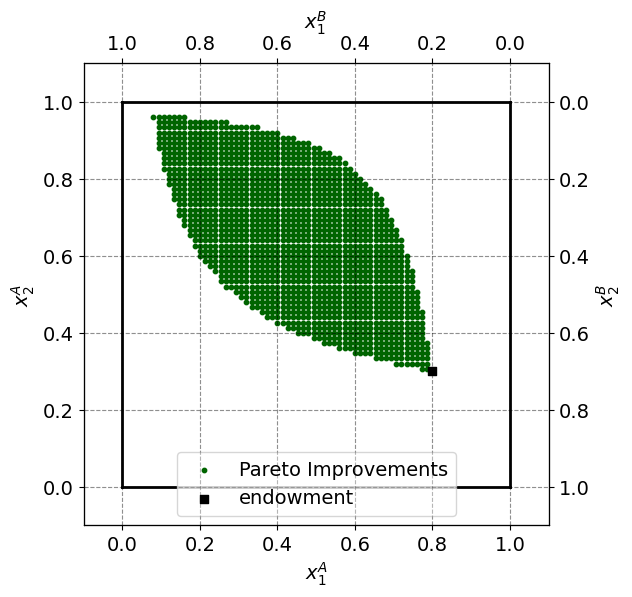

In [6]:
import numpy as np
model = ExchangeEconomyClass()
parameters = model.par
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)
utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)


# code for solving the model 
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB


## loop over x1 and x2 and get all combinations
N = 75 ## given in the Task! 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))



# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

#Plotting Pareto improvements and initial endowment
pareto_improvements = np.array(pareto_improvements)
#print(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='darkgreen', label='Pareto Improvements', s=10)
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

## add legend with pareto improvments and initial endowments
ax_A.legend()





# Question 2

Here we calculate the error in the market clearing condition and present it for each p1 being an element of P1.
First, we need to define P1 and later we use the class inside ExchangeEconomy.py to calculate directly the error for each good.

In [7]:
## defining p1 
N = 75  ## from task 1
P1 = [] ## empty list
for i in range(N + 1):
    ## formula given in the task
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)



[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]


Here we go through each value in P1 to calculate the market error for each of the two goods:

In [8]:
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    print(f"For p1 = {p1}:")
    print("   Error in market clearing condition 1:", eps1)
    print("   Error in market clearing condition 2:", eps2)


For p1 = 0.5:
   Error in market clearing condition 1: 0.5333333333333332
   Error in market clearing condition 2: -0.2666666666666666
For p1 = 0.527:
   Error in market clearing condition 1: 0.4752688172043007
   Error in market clearing condition 2: -0.2504666666666665
For p1 = 0.553:
   Error in market clearing condition 1: 0.4247136829415309
   Error in market clearing condition 2: -0.23486666666666645
For p1 = 0.58:
   Error in market clearing condition 1: 0.3770114942528733
   Error in market clearing condition 2: -0.2186666666666665
For p1 = 0.607:
   Error in market clearing condition 1: 0.3335529928610652
   Error in market clearing condition 2: -0.20246666666666646
For p1 = 0.633:
   Error in market clearing condition 1: 0.2952080042127434
   Error in market clearing condition 2: -0.18686666666666651
For p1 = 0.66:
   Error in market clearing condition 1: 0.25858585858585836
   Error in market clearing condition 2: -0.1706666666666664
For p1 = 0.687:
   Error in market cleari

# Question 3

We want to know the market clearing price. In the market clearing price, there two error graphs need to intersect. Therefore, we plot them to visualize the market clearing price.

/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  demand_x1 =  self.par.alpha * (p1*self.par.w1A + self.par.w2A)/p1
/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  demand_x1 = self.par.beta * (p1* (1-self.par.w1A) + 1- self.par.w2A)/p1


0.0009523809523811488
0.0009009009009011137


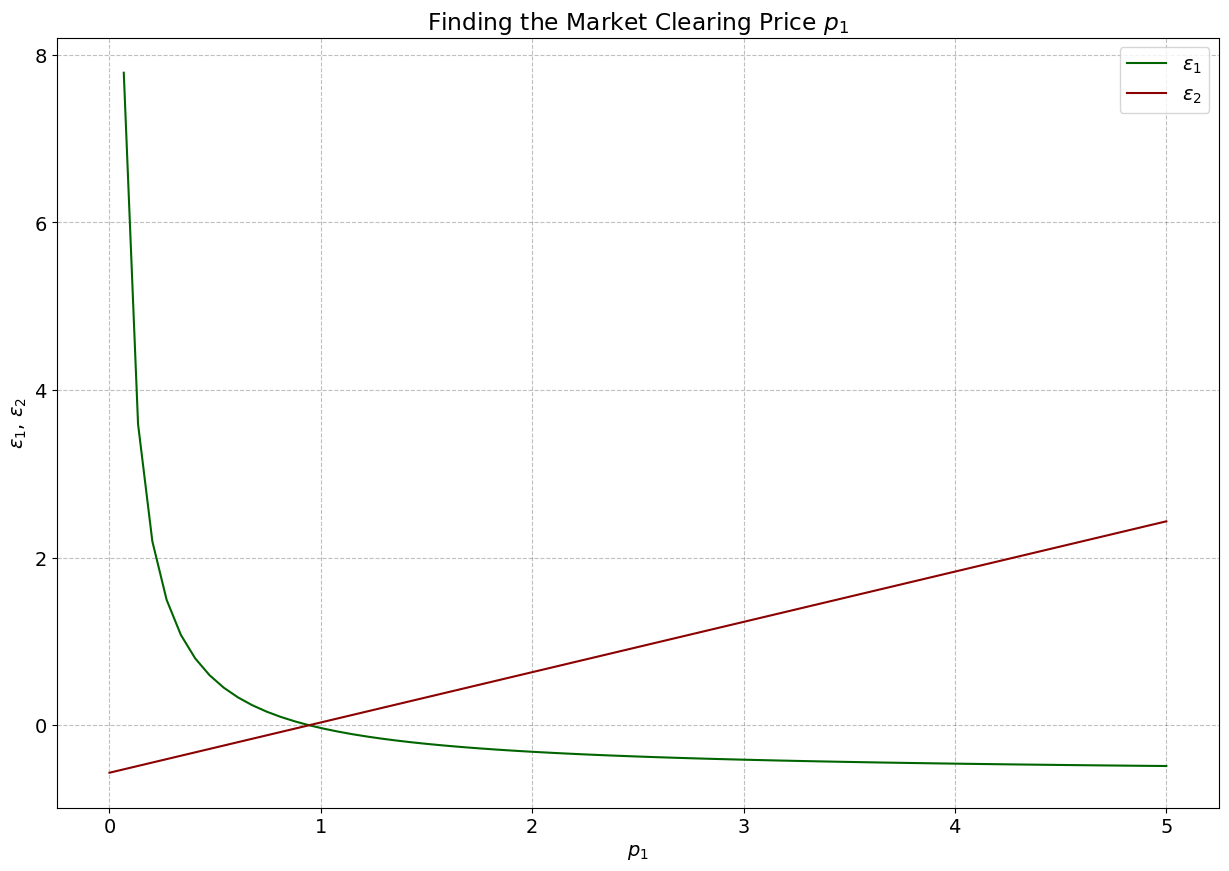

In [9]:
N  = 75
P1 = np.linspace(0, 5, N)

# Calculate market clearing errors for each p1 in P1
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    epsilon_1.append(eps1) ## add 
    epsilon_2.append(eps2)

print(np.min(np.abs(epsilon_1)))
print(np.min(np.abs(epsilon_2)))


# Plotting
plt.figure(figsize=(15, 10))
plt.plot(P1, epsilon_1, label='$\\epsilon_1$', color='darkgreen')
plt.plot(P1, epsilon_2, label='$\\epsilon_2$', color='darkred')
plt.title('Finding the Market Clearing Price $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('$\\epsilon_1$, $\\epsilon_2$')
## adding legend 
plt.legend()
plt.show()


Here we can also get p1 as the intersection point by looping over all values in P1.

In [10]:
## for which p1 do we get the intersection? 
# Find the point of intersection
intersection_point = None
for i in range(1, len(P1)):
    if (epsilon_1[i] > 0 and epsilon_2[i] < 0) or (epsilon_1[i] < 0 and epsilon_2[i] > 0):
        intersection_point = 1-P1[i]
        break ## there can only be one market clearing price, 
    ## so we break the loop after finding the first intersection point!

print("Intersection point:", intersection_point)

Intersection point: 0.9324324324324325


# Question 4

In the following questions consumer A chooses the price to maximize her own utility. 
We will either directly loop over all possible solutions or use solvers to numerically find the solution.

## Question 4a

For the first question we need to find the allocation if only prices in P1 can be chosen. P1 was already defined in task 2. Since we already used P1 it seemed easier to just use a for loop to get the demand at each p1 in P1 and then calculate the utility until we maximize it.

In [11]:
## to start for loop it is necessary to define some parameters that will be updated 
negative_utility = -np.inf
value = []
x1_0 = np.nan
x2_0 = np.nan
p_solution = np.nan

N = 75  ## redefining from task 2
P1 = []
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)

## finding p1 that maximizes utility 
for p1 in P1: 
    x1B, x2B = model.demand_B(p1) 
    x1A = 1 - x1B 
    x2A = 1 - x2B
    utility_A_now = model.utility_A(1-x1B, 1-x2B)
    if utility_A_now > negative_utility: 
        negative_utility = utility_A_now
        x1_0 = x1A
        x2_0 = x2A
        p_solution = p1

## prinitng solution
print("Maximum Utility for A:", negative_utility)
print("Optimal x1 for A:", x1_0)
print("Optimal x2 for A:", x2_0)
print("Optimal price:", p_solution)
print("Demand for A at optimal price:", model.demand_A(p_solution))

Maximum Utility for A: 0.6336162385929179
Optimal x1 for A: 0.6193605370075959
Optimal x2 for A: 0.6408666666666667
Optimal price: 1.887
Demand for A at optimal price: (0.31966083730789613, 1.2064000000000001)


/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:19: RuntimeWarning: invalid value encountered in scalar power
  return x1A**(self.par.alpha)*x2A**(1-self.par.alpha)


## Question 4b

Now we can only choose positive prices to maximize the utility of consumer A. We are no longer bounded to values for the price inside of P1. Therefore, we decided to use a solver.

In [12]:
## use solver since P1 needs to be positve 
## defining constraint for p to be positive 
def constraint_p(p):
    return p  # This ensures that p is non-negative


constraints ={'type': 'ineq', 'fun': constraint_p} ## adding constraint for p 


## bounds for solutions
bounds = [(0,None)] ## non negative price 

# c. call solver, use SLSQP
initial_guess = 1
## slsqp als method kann bounds und constrains annehmen
sol_case2 = optimize.minimize(
model.negative_utility_A, initial_guess, bounds = bounds,
method='SLSQP',constraints= constraints)

p_optimum = sol_case2.x
x1_sol_4b = 1-model.demand_B(p_optimum)[0]
x2_sol_4b = 1-model.demand_B(p_optimum)[1]

## print solution 
print("Optimal price", p_optimum) ## optimal price 
print("optimal amount of good 1 for person A", 1-model.demand_B(p_optimum)[0])
print("optimal amount of good 2 for person A",1-model.demand_B(p_optimum)[1])
print("Utility for person A in optimum", -model.negative_utility_A(p_optimum))

Optimal price [1.89678021]
optimal amount of good 1 for person A [0.6206357]
optimal amount of good 2 for person A [0.64021465]
Utility for person A in optimum [0.63362065]


# Question 5

We are still maximizing the utility of consumer A in task 5.
To do so, we will first again loop over all possible values. In the second part (question 5b) we will use a solver again.

## Question 5a

The choice set is restricted to C from question 1 in 5a. Therefore, we redefine the important parts of question 1 again. Then, we loop over all possible solutions. 

In [13]:
## calculate the utility for both consumers with their initial endowments
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)
utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)


## here we define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB


## loop over x1 and x2 and get all combinations - we did this already in question 1
N = 75 ## given in the Task! 
pareto_improvements = [] ## will be filled by the for loop 
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))


## we need some values that will be updated during the for loop 
utility_start = -50
x1_start = 0
x2_start = 0
x_start = [0,0]
## here we solve the model 
for x in pareto_improvements: 
    if model.utility_A(x[0],x[1]) > utility_start: 
        utility_start = model.utility_A(x_start[0], x_start[1])
        x_start[0] = x[0]
        x_start[1] = x[1]


## printing solution 
print("Optimal Allocation for person A:", x_start) ## optimal allocation 
print("Utility for person A when having optimal allocation:", model.utility_A(x_start[0], x_start[1])) ## maximized utility

Optimal Allocation for person A: [0.5733333333333334, 0.8400000000000001]
Utility for person A when having optimal allocation: 0.7395858408079152


## Question 5b

Now we use a solver again to take into account the given constraint for consumer B.

In [29]:
## for consumer B needs to be as well off as with his endowment
constraints = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(1-model.par.w1A, 1-model.par.w2A)})
## bounds for solutions
bounds = ((0, 1), (0, 1)) 

# c. call solver, use SLSQP  
initial_guess = [model.par.w1A, model.par.w2A]
## slsqp as method can deal with bounds und constrains 
sol_case2 = optimize.minimize(
    model.negative_utility_A_5b, initial_guess,
    method='SLSQP', bounds=bounds, constraints=constraints)

# print optimal solution
x1_optimal_5b = sol_case2.x[0]
x2_optimal_5b = sol_case2.x[1]
print("Optimal amount of good 1 for person A:",sol_case2.x[0]) ## optimal amount for person A of good 1
print("Optimal amount of good 2 for person A:",sol_case2.x[1]) ## optimal amount for person A of good 2
print("Maximized utility for person A:", model.utility_A(x1_optimal_5b, x2_optimal_5b))

Optimal amount of good 1 for person A: 0.5757450601538892
Optimal amount of good 2 for person A: 0.8444377859258702
Maximized utility for person A: 0.7432276287154398


# Question 6

We are going to maximize the aggregate utility of both consumers which is just the sum of the individual utility functions. Then we will plot the solutions of all previous maximization problems in question 6b and compare the results to each other

## Question 6a

Here we maximize the aggregate utility. For this, we again use a solver.

In [38]:
# Define the constraints for xA1 and xA2
constraints = ({'type': 'ineq', 'fun': lambda x: x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[0]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]})

# Bounds for solutions
bounds = ((0, 1), (0, 1)) ## both can only be between 0 and 1 

# Call the solver, use SLSQP
initial_guess = [0.5, 0.5]

sol = optimize.minimize(model.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Unpack solution
xA1_optimal = sol.x[0]
xA2_optimal = sol.x[1]
utility_A = model.utility_A(xA1_optimal, xA2_optimal)
utility_B = model.utility_B(1 - xA1_optimal, 1 - xA2_optimal)

# Print the solution
print("Optimal Allocation:")
print("xA1:", xA1_optimal)
print("xA2:", xA2_optimal)
print("xB1:", 1-xA1_optimal)
print("xB2:", 1-xA2_optimal)
print("Utility for A:", utility_A)
print("Utility for B:", utility_B)

Optimal Allocation:
xA1: 0.33341166147388446
xA2: 0.6665883190561481
xB1: 0.6665883385261155
xB2: 0.3334116809438519
Utility for A: 0.5291336663821624
Utility for B: 0.5291336869853834


## Question 6b

Now we are plotting all previous optimization problems.

First, we define the initial utility of both consumers and set some model parameters equally to question 1.

In [39]:
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)

utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)


# code for solving the model 
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB

## loop over x1 and x2 and get all combinations
N = 75 ## given in the Task! 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A)) 



Now we actually plot all previous solutions: 

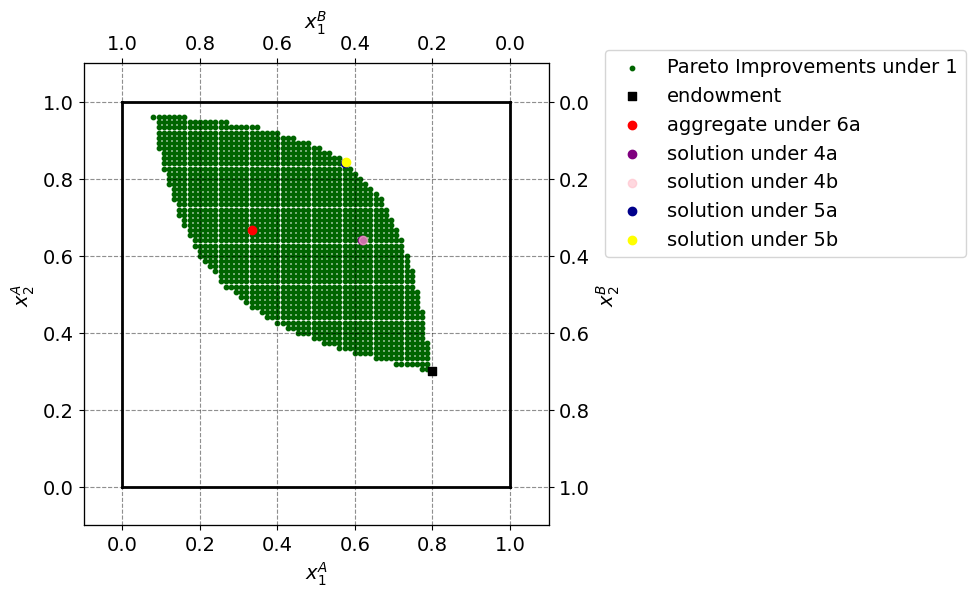

In [44]:
# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

#Plotting Pareto improvements, initial endowment and previous solutions of the different tasks
pareto_improvements = np.array(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='darkgreen', label='Pareto Improvements under 1', s=10)
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
## plotting 6b 
ax_A.scatter(xA1_optimal, xA2_optimal,marker='o',color='red',label='aggregate under 6a')
## plotting 4a 
ax_A.scatter(x1_0, x2_0, marker = 'o', color = "purple", label = "solution under 4a")
## plotting 4b 
ax_A.scatter(x1_sol_4b, x2_sol_4b, marker = 'o', color = "pink", alpha = 0.6, label = "solution under 4b")
## plotting 5a 
ax_A.scatter(x_start[0], x_start[1], marker = 'o', color = "darkblue", label = "solution under 5a")
## plotting 5b 
ax_A.scatter(x1_optimal_5b, x2_optimal_5b, marker = 'o', color = "yellow", label = "solution under 5b")

## add legend with pareto improvments, initial endowments and all solutions of the previous tasks 
ax_A.legend(bbox_to_anchor=(1.1, 1.05)) ## adding bbox_to_anchor to shift the plot a bit out of the plot! 


When comparing the results, we see that all of them are part in the Edgeworth box which means nobody is worse off than the initial endowment. There is an overlap between solution 4a and 4b since they are so close to each other. As well as an overlap in solution 5a and 5b. Therefore, one only sees the pink colour for solution 4b and the yellow one for solution 5b. When comparing all the results, then the solution in 6a seems to be the most appropiate when both utility functions are maximized as a sum of each other. The solution in 6a takes both equally into consideration and lies more or less between the solutions to question 4 and question 5.

# Question 7

We generate 50 random values from a uniform distribution being between 0 and 1. To ilustrate them, we plot these random values.

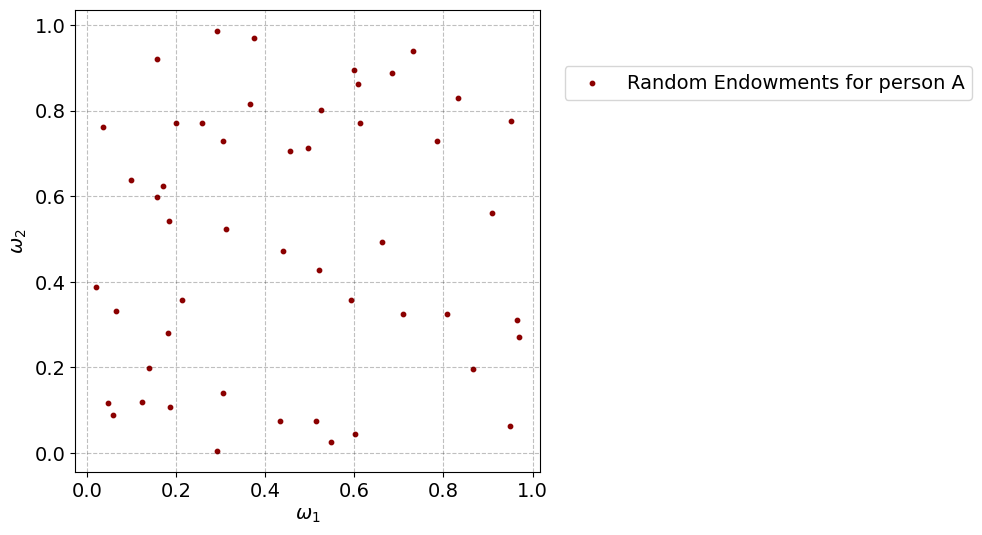

In [47]:
# Set the seed for reproducibility
np.random.seed(42)

# Generate the set W with 50 elements
# produces a 2-dimensional array with 50 rows and 1 column by using random.rand()
omega_1 = np.random.rand(50,1)
omega_2 = np.random.rand(50,1)


# Plotting setup
fig = plt.figure(frameon= True, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Axis labels and inverted axes for B
ax_A.set_xlabel("$\\omega_1$")
ax_A.set_ylabel("$\\omega_2$")


ax_A.scatter(omega_1, omega_2, color='darkred', label='Random Endowments for person A', s=10)

## add legend
ax_A.legend(bbox_to_anchor=(1.95, 0.9))

# Question 8

We want to find the market equilibrium for each random endowment of person A.  We will use a solver again. 
However, since we don't have one pair of endowment but rather a set of endowments we need to combine the use of solver and for loop. 

First we need to change the format of our random endowments, defined in question 7, to a list.

In [48]:
### NECESSARY TO CHANGE FORMAT OF omega_1 & omega_2 TO RUN OPTIMIZE.MINIMIZE IN TASK 8 
print(type(omega_1)) ## need to change format
omega_1_list = np.ndarray.tolist(omega_1)
print(type(omega_1_list)) ## now a list 

type(omega_2)
omega_2_list = np.ndarray.tolist(omega_2)
type(omega_2_list)

<class 'numpy.ndarray'>
<class 'list'>


list

Here we are using the combination of first looping and then for each for-loop using a solver to find the market equilibrium.

Since we still have a list of values we need to use two for-loops to unpack the list and use the pairs of random endowments as initival values for our solver.

In [49]:
## defining constraints for both consumers 
con1 = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(1-w1A, 1-w2A)})
con2 = ({'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - model.utility_A(w1A, w2A)})
cons = [con1,con2]
bounds = ((0, 1), (0, 1)) ## boundaries for solution (needs to be between 0 and 1)
market_equilibrium = [] ## will be filled during the for-loop 


# Use solver to find market equilibria for each pair of random endowment 

for w1A_list, w2A_list in zip(omega_1_list, omega_2_list):
    for w1A, w2A in zip(w1A_list, w2A_list):
    # Define constraints inside the loop with specific values of w1A and w2A
        x0 = [w1A, w2A]
        sol = optimize.minimize(model.aggregate_utility, x0, method="SLSQP", bounds=bounds, constraints=cons)
        market_equilibrium.append(sol.x)


Now we plot our market equilibria (in darkgreen) on top of the random endowments (in darkred).

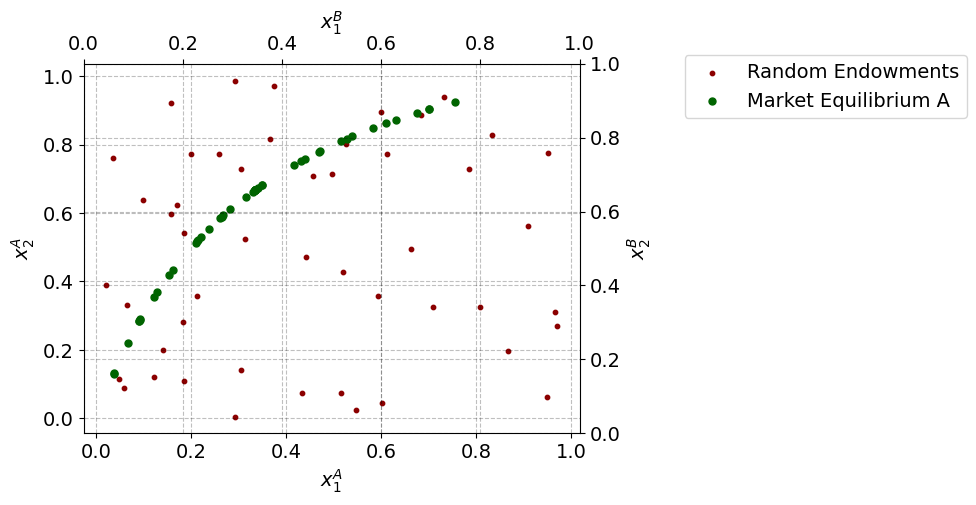

In [83]:
## plotting solution task 8 
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

#Plotting market equilibrium 
market_equilibrium_A = np.array(market_equilibrium)
ax.scatter(omega_1, omega_2, color='darkred', label='Random Endowments', s=10)
ax.scatter(market_equilibrium_A[:, 0], market_equilibrium_A[:, 1], color='darkgreen', label='Market Equilibrium A', s=25)
ax.set_xlabel("$x_1^A$")
ax.set_ylabel("$x_2^A$")
ax.tick_params(axis='x')
ax.tick_params(axis='y')
#ax.set_xlim([0,1]) ## talk about this! 
#ax.set_ylim([0,1])    
#ax2.set_xlim([1, 0.1])
#ax2.set_ylim([1,0.1])

## SETTING the other axes 
#ax2.scatter(1-market_equilibrium_A[:, 0],1-market_equilibrium_A[:, 1], color='pink', label='Market Equilibrium B', s=25)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("$x_1^B$")
ax2.set_ylabel("$x_2^B$")    
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')

ax.legend(bbox_to_anchor=(1.8, 1.05))